# Projeto 1

In [2]:
# pip install yfinance
# !pip install python-bcb
# !pip install matplotlib
# !pip install mplcyberpunk


In [3]:
import yfinance as yf
from bcb import sgs as bcb
from matplotlib import pyplot as plt

import mplcyberpunk
plt.style.use('cyberpunk')

In [4]:
ibov = yf.download("^BVSP", start = '2010-01-01')['Adj Close']
cdi = bcb.get({'CDI': 12}, start = '2010-01-01')

dataframe = cdi.merge(ibov, left_index = True, right_index = True)
dataframe.columns = ['CDI', 'IBOV']

[*********************100%***********************]  1 of 1 completed


In [5]:
dataframe['MM12_IBOV'] = dataframe['IBOV'].rolling(window=252).mean()

dataframe['IBOV_BUY'] = dataframe['IBOV'] > dataframe['MM12_IBOV']
dataframe['CDI_BUY'] = dataframe['IBOV'] < dataframe['MM12_IBOV']

In [6]:
dataframe['RETURN_IBOV'] = ibov.pct_change().dropna()
dataframe['RETURN_CDI'] = cdi / 100

In [7]:
dataframe.loc[dataframe['CDI_BUY'] == True, 'RETURN_FINAL'] = dataframe['RETURN_CDI']
dataframe.loc[dataframe['IBOV_BUY'] == True, 'RETURN_FINAL'] = dataframe['RETURN_IBOV']

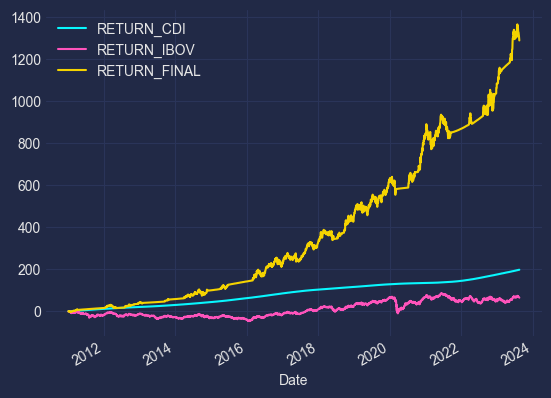

In [8]:
returns = dataframe[['RETURN_CDI', 'RETURN_IBOV', 'RETURN_FINAL']].dropna()

acum_returns = (( 1 + returns).cumprod() - 1 ) * 100
acum_returns.plot()

plt.savefig('IBOV_CDI.png', dpi = 300)